In [0]:
# import libraries

# linear algebra
import numpy as np 
# data processing
import pandas as pd 
# data visualization
from matplotlib import pyplot as plt

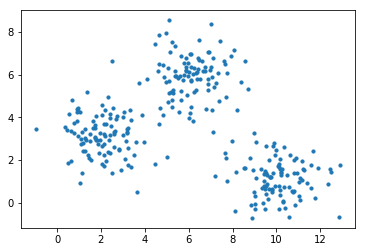

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/InsightLab/data-science-cookbook/master/2019/09-clustering/dataset.csv', header=None)
dataset = np.array(dataset)

plt.scatter(dataset[:,0], dataset[:,1], s=10)
plt.show()

In [0]:
def calculate_initial_centers(dataset, k):
    """
    Inicializa os centróides iniciais de maneira arbitrária 
    
    Argumentos:
    dataset -- Conjunto de dados - [m,n]
    k -- Número de centróides desejados
    
    Retornos:
    centroids -- Lista com os centróides calculados - [k,n]
    """
    
    #### CODE HERE ####
    
    dims = len(dataset[0])
    
    zipps = list(zip(*dataset))
    
    mins = []
    maxs = []
    
    for dim in range(dims):
        mins.append(min(zipps[dim]))
        maxs.append(max(zipps[dim]))
    
    centroids = []
    
    for dim in range(dims):
        centroids.append(np.random.uniform(mins[dim], maxs[dim], k))

    ### END OF CODE ###
  
    return np.array(list(zip(*centroids)))

In [0]:
def euclidean_distance(a, b):
    """
    Calcula a distância euclidiana entre os pontos a e b
    
    Argumentos:
    a -- Um ponto no espaço - [1,n]
    b -- Um ponto no espaço - [1,n]
    
    Retornos:
    distance -- Distância euclidiana entre os pontos
    """
    
    #### CODE HERE ####
    sums = 0
    
    for i in range(len(a)):
        sums += np.power((a[i] - b[i]), 2)
    
    distance = np.sqrt(sums)
    
    ### END OF CODE ###
    
    return distance

In [0]:
def nearest_centroid(a, centroids):
    """
    Calcula o índice do centroid mais próximo ao ponto a
    
    Argumentos:
    a -- Um ponto no espaço - [1,n]
    centroids -- Lista com os centróides - [k,n]
    
    Retornos:
    nearest_index -- Índice do centróide mais próximo
    """
    
    #### CODE HERE ####
    nearest_index = 0
    min_distance = np.inf
    i = 0
    
    
    
    for centro in centroids:
        if euclidean_distance(a, centro) < min_distance:
            min_distance = euclidean_distance(a, centro)
            nearest_index = i
        i += 1
      
    ### END OF CODE ###
    
    return nearest_index


In [0]:
def all_nearest_centroids(dataset, centroids):
    """
    Calcula o índice do centroid mais próximo para cada 
    ponto do dataset
    
    Argumentos:
    dataset -- Conjunto de dados - [m,n]
    centroids -- Lista com os centróides - [k,n]
    
    Retornos:
    nearest_indexes -- Índices do centróides mais próximos - [m,1]
    """
    
    #### CODE HERE ####
    
    dims = len(dataset[0])
    nearest_indexes = []
    for data in range(len(dataset)):
        nearest_indexes.append(nearest_centroid(dataset[data], centroids))
      
    ### END OF CODE ###
    
    return np.array(nearest_indexes)


In [0]:
def inertia(dataset, centroids, nearest_indexes):
    """
    Soma das distâncias quadradas das amostras para o 
    centro do cluster mais próximo.
    
    Argumentos:
    dataset -- Conjunto de dados - [m,n]
    centroids -- Lista com os centróides - [k,n]
    nearest_indexes -- Índices do centróides mais próximos - [m,1]
    
    Retornos:
    inertia -- Soma total do quadrado da distância entre 
    os dados de um cluster e seu centróide
    """
    
    #### CODE HERE ####
    inertia = 0

    for data in range(len(dataset)):
        distance_data_centroid = euclidean_distance(dataset[data], centroids[nearest_indexes[data]])
        inertia += np.power(distance_data_centroid, 2)
    
    #inertia = np.power(sum_distance, 2)
      
    ### END OF CODE ###
    
    return inertia

In [0]:
def update_centroids(dataset, centroids, nearest_indexes):
    """
    Atualiza os centroids
    
    Argumentos:
    dataset -- Conjunto de dados - [m,n]
    centroids -- Lista com os centróides - [k,n]
    nearest_indexes -- Índices do centróides mais próximos - [m,1]
    
    Retornos:
    centroids -- Lista com centróides atualizados - [k,n]
    """
   
    #### CODE HERE ####
    centroid_data_group = [[] for i in range(len(centroids))] 
    
    for data in range(len(dataset)):
        centroid_data_group[nearest_indexes[data]].append(list(dataset[data]))
        
    new_centroids = [[] for i in range(len(centroids))]
    
    i = 0
    
    for centroid in centroid_data_group:

        new_centroid_data_group = list(zip(*centroid))
        
        for column in range(len(dataset[0])):
            new_centroids[i].append(np.mean(new_centroid_data_group[column]))
        
        i += 1
            
    ### END OF CODE ###
    
    return np.array(new_centroids)

In [0]:
class KMeans():
    
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    
    def fit(self,X):
        
        # Inicializa os centróides
        self.cluster_centers_ = calculate_initial_centers(X, self.n_clusters)
        
        # Computa o cluster de cada amostra
        self.labels_ = all_nearest_centroids(X, self.cluster_centers_)
        
        # Calcula a inércia inicial
        self.inertia_ = inertia(X, self.cluster_centers_, self.labels_)
        
        for index in range(self.max_iter):
            
            #### CODE HERE ####
            self.cluster_centers_ = update_centroids(X, self.cluster_centers_, self.labels_)
            self.labels_ = all_nearest_centroids(X, self.cluster_centers_)
            self.inertia_ = inertia(X, self.cluster_centers_, self.labels_)
      
            ### END OF CODE ###
                    
        return self
    
    def predict(self, X):
        
        return [None] # não sei como faz o predict

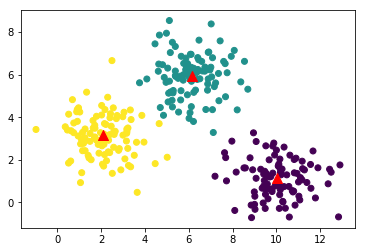

In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset)

plt.scatter(dataset[:,0], dataset[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], marker='^', c='red', s=100)
plt.show()

# Scikit-Learn

In [0]:
from sklearn import cluster

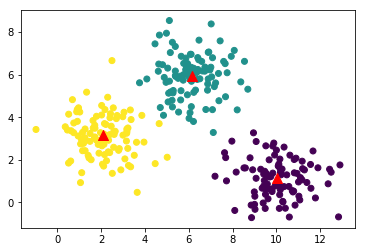

In [12]:
sk_kmeans = cluster.KMeans(n_clusters=3)
sk_kmeans.fit(dataset)

plt.scatter(dataset[:,0], dataset[:,1], c=sk_kmeans.labels_)
plt.scatter(sk_kmeans.cluster_centers_[:,0], 
            sk_kmeans.cluster_centers_[:,1], marker='^', c='red', s=100)
plt.show()

# Elbow Method

Número de Clusters: 1 - Inertia: 4959.868027419316
Número de Clusters: 2 - Inertia: 1823.4924169141427
Número de Clusters: 3 - Inertia: 608.6035508327776
Número de Clusters: 4 - Inertia: 545.3040354685787
Número de Clusters: 5 - Inertia: 494.02658888356643


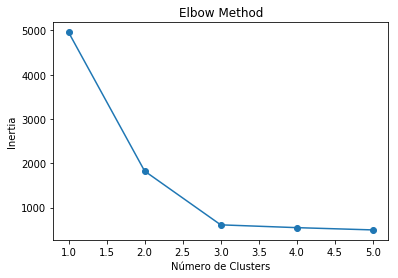

In [13]:
inertia_list = []
n_clusters_test = 6

for i in range(1, n_clusters_test):
    em_kmeans = KMeans(n_clusters = i)
    em_kmeans.fit(dataset)
    print('Número de Clusters: {} - Inertia: {}'.format(i, em_kmeans.inertia_))
    inertia_list.append(em_kmeans.inertia_)  
    
plt.plot(range(1, n_clusters_test), inertia_list, marker='o')
plt.title('Elbow Method')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.show()